<h1>Extracting Stock Data Using a Python Library</h1>


A company's stock share is a piece of the company more precisely:
<p><b>A stock (also known as equity) is a security that represents the ownership of a fraction of a corporation. This
entitles the owner of the stock to a proportion of the corporation's assets and profits equal to how much stock they own. Units of stock are called "shares." [1]</p></b>

An investor can buy a stock and sell it later. If the stock price increases, the investor profits, If it decreases,the investor with incur a loss.  Determining the stock price is complex; it depends on the number of outstanding shares, the size of the company's future profits, and much more. People trade stocks throughout the day the stock ticker is a report of the price of a certain stock, updated continuously throughout the trading session by the various stock market exchanges. 
<p>You are a data scientist working for a hedge fund; it's your job to determine any suspicious stock activity. In this lab you will extract stock data using a Python library. We will use the <coode>yfinance</code> library, it allows us to extract data for stocks returning data in a pandas dataframe. You will use the lab to extract.</p>


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Using yfinance to Extract Stock Info</li>
        <li>Using yfinance to Extract Historical Share Price Data</li>
        <li>Using yfinance to Extract Historical Dividends Data</li>
        <li>Exercise</li>
    </ul>

</div>

<hr>


In [41]:
%pip install yfinance==0.2.4
%pip install pandas==1.3.3

^C
Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf
import pandas as pd

## Using the yfinance Library to Extract Stock Data


Using the `Ticker` module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, here the company is Apple and the ticker symbol is `AAPL`.


In [2]:
apple = yf.Ticker("AAPL")

Now we can access functions and variables to extract the type of data we need. You can view them and what they represent here https://aroussi.com/post/python-yahoo-finance.


In [3]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
import urllib.request

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json'
output_file = 'apple.json'

urllib.request.urlretrieve(url, output_file)
print(f"Downloaded {output_file} from {url}")

Downloaded apple.json from https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json


### Stock Info


Using the attribute  <code>info</code> we can extract information about the stock as a Python dictionary.


In [5]:
import json
with open('apple.json') as json_file:
    apple_info = json.load(json_file)
    # Print the type of data variable    
    #print("Type:", type(apple_info))
apple_info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

We can get the <code>'country'</code> using the key country


In [6]:
apple_info['country']

'United States'

### Extracting Share Price


A share is the single smallest part of a company's stock  that you can buy, the prices of these shares fluctuate over time. Using the <code>history()</code> method we can get the share price of the stock over a certain period of time. Using the `period` parameter we can set how far back from the present to get data. The options for `period` are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.


In [7]:
apple_share_price_data = apple.history(period="10y")

C:\Users\Zahran\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:631: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


The format that the data is returned in is a Pandas DataFrame. With the `Date` as the index the share `Open`, `High`, `Low`, `Close`, `Volume`, and `Stock Splits` are given for each day.


In [19]:
apple_share_price_data.head(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2014-07-18 00:00:00-04:00,20.702546,20.950215,20.569865,20.881664,199952000,0.0,0.0
1,2014-07-21 00:00:00-04:00,21.005499,21.007711,20.724660,20.773310,156316000,0.0,0.0
2,2014-07-22 00:00:00-04:00,20.936948,20.983385,20.813113,20.945793,220788000,0.0,0.0
3,2014-07-23 00:00:00-04:00,21.100587,21.644576,21.045304,21.491995,371672000,0.0,0.0
4,2014-07-24 00:00:00-04:00,21.458822,21.520739,21.321718,21.456610,182916000,0.0,0.0
5,2014-07-25 00:00:00-04:00,21.416815,21.635737,21.370377,21.598145,173876000,0.0,0.0
6,2014-07-28 00:00:00-04:00,21.631313,21.945323,21.571608,21.896673,221272000,0.0,0.0
7,2014-07-29 00:00:00-04:00,21.965228,21.989553,21.726403,21.755150,172572000,0.0,0.0
8,2014-07-30 00:00:00-04:00,21.768414,21.825907,21.598140,21.704285,132040000,0.0,0.0
9,2014-07-31 00:00:00-04:00,21.485364,21.549491,21.080689,21.140394,227372000,0.0,0.0


In [20]:
apple_share_price_data.tail(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
2507,2024-07-05 00:00:00-04:00,221.649994,226.449997,221.649994,226.339996,60412400,0.0,0.0
2508,2024-07-08 00:00:00-04:00,227.089996,227.850006,223.250000,227.820007,59085900,0.0,0.0
2509,2024-07-09 00:00:00-04:00,227.929993,229.399994,226.369995,228.679993,48076100,0.0,0.0
2510,2024-07-10 00:00:00-04:00,229.300003,233.080002,229.250000,232.979996,62627700,0.0,0.0
2511,2024-07-11 00:00:00-04:00,231.389999,232.389999,225.770004,227.570007,64710600,0.0,0.0
2512,2024-07-12 00:00:00-04:00,228.919998,232.639999,228.679993,230.539993,53008200,0.0,0.0
2513,2024-07-15 00:00:00-04:00,236.479996,237.229996,233.089996,234.399994,62631300,0.0,0.0
2514,2024-07-16 00:00:00-04:00,235.000000,236.270004,232.330002,234.820007,43234300,0.0,0.0
2515,2024-07-17 00:00:00-04:00,229.449997,231.460007,226.639999,228.880005,57281800,0.0,0.0
2516,2024-07-18 00:00:00-04:00,230.345001,230.440002,222.449997,223.110001,29919550,0.0,0.0


We can reset the index of the DataFrame with the `reset_index` function. We also set the `inplace` paramter to `True` so the change takes place to the DataFrame itself.


In [10]:
apple_share_price_data.reset_index(inplace=True)

We can plot the `Open` price against the `Date`:


<Axes: xlabel='Date'>

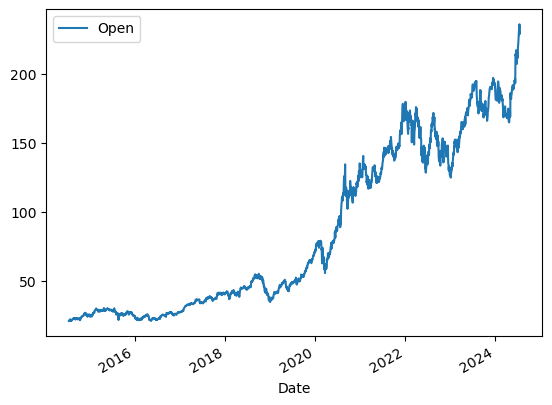

In [11]:
apple_share_price_data.plot(x="Date", y="Open")

### Extracting Dividends


Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. Using the variable `dividends` we can get a dataframe of the data. The period of the data is given by the period defined in the 'history` function.


In [12]:
apple.dividends

Date
2014-08-07 00:00:00-04:00    0.1175
2014-11-06 00:00:00-05:00    0.1175
2015-02-05 00:00:00-05:00    0.1175
2015-05-07 00:00:00-04:00    0.1300
2015-08-06 00:00:00-04:00    0.1300
2015-11-05 00:00:00-05:00    0.1300
2016-02-04 00:00:00-05:00    0.1300
2016-05-05 00:00:00-04:00    0.1425
2016-08-04 00:00:00-04:00    0.1425
2016-11-03 00:00:00-04:00    0.1425
2017-02-09 00:00:00-05:00    0.1425
2017-05-11 00:00:00-04:00    0.1575
2017-08-10 00:00:00-04:00    0.1575
2017-11-10 00:00:00-05:00    0.1575
2018-02-09 00:00:00-05:00    0.1575
2018-05-11 00:00:00-04:00    0.1825
2018-08-10 00:00:00-04:00    0.1825
2018-11-08 00:00:00-05:00    0.1825
2019-02-08 00:00:00-05:00    0.1825
2019-05-10 00:00:00-04:00    0.1925
2019-08-09 00:00:00-04:00    0.1925
2019-11-07 00:00:00-05:00    0.1925
2020-02-07 00:00:00-05:00    0.1925
2020-05-08 00:00:00-04:00    0.2050
2020-08-07 00:00:00-04:00    0.2050
2020-11-06 00:00:00-05:00    0.2050
2021-02-05 00:00:00-05:00    0.2050
2021-05-07 00:00:00-04:

In [13]:
apple.dividends.describe()

count    40.000000
mean      0.185062
std       0.041508
min       0.117500
25%       0.142500
50%       0.192500
75%       0.220000
max       0.250000
Name: Dividends, dtype: float64

We can plot the dividends overtime:


<Axes: xlabel='Date'>

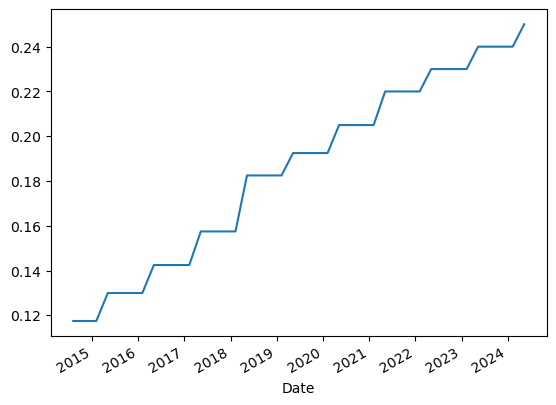

In [14]:
apple.dividends.plot()

## Exercise 


Now using the `Ticker` module create an object for AMD (Advanced Micro Devices) with the ticker symbol is `AMD` called; name the object <code>amd</code>.


In [4]:
amd = yf.Ticker("AMD")

In [5]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
import urllib.request

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json'
output_file = 'amd.json'

urllib.request.urlretrieve(url, output_file)
print(f"Downloaded {output_file} from {url}")

Downloaded amd.json from https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json


In [7]:
import json
with open('amd.json') as json_file:
    amd_info = json.load(json_file)
    # Print the type of data variable    
    #print("Type:", type(apple_info))
amd_info

{'zip': '95054',
 'sector': 'Technology',
 'fullTimeEmployees': 15500,
 'longBusinessSummary': 'Advanced Micro Devices, Inc. operates as a semiconductor company worldwide. The company operates in two segments, Computing and Graphics; and Enterprise, Embedded and Semi-Custom. Its products include x86 microprocessors as an accelerated processing unit, chipsets, discrete and integrated graphics processing units (GPUs), data center and professional GPUs, and development services; and server and embedded processors, and semi-custom System-on-Chip (SoC) products, development services, and technology for game consoles. The company provides processors for desktop and notebook personal computers under the AMD Ryzen, AMD Ryzen PRO, Ryzen Threadripper, Ryzen Threadripper PRO, AMD Athlon, AMD Athlon PRO, AMD FX, AMD A-Series, and AMD PRO A-Series processors brands; discrete GPUs for desktop and notebook PCs under the AMD Radeon graphics, AMD Embedded Radeon graphics brands; and professional graphi

<b>Question 1</b> Use the key  <code>'country'</code> to find the country the stock belongs to, remember it as it will be a quiz question.


In [8]:
amd_info['country']

'United States'

<b>Question 2</b> Use the key  <code>'sector'</code> to find the sector the stock belongs to, remember it as it will be a quiz question.


In [9]:
amd_info['sector']

'Technology'

<b>Question 3</b> Obtain stock data for AMD using the `history` function, set the `period` to max. Find the `Volume` traded on the first day (first row).


In [21]:
amd_share_price_data = amd.history(period="10y")
amd_share_price_data.reset_index(inplace=True)
amd_share_price_data.head(10)

C:\Users\Zahran\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:631: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2014-07-18 00:00:00-04:00,3.73,3.84,3.67,3.83,137577700,0.0,0.0
1,2014-07-21 00:00:00-04:00,3.86,3.87,3.75,3.78,34219100,0.0,0.0
2,2014-07-22 00:00:00-04:00,3.82,3.86,3.78,3.80,34004800,0.0,0.0
3,2014-07-23 00:00:00-04:00,3.82,3.83,3.75,3.76,31748200,0.0,0.0
4,2014-07-24 00:00:00-04:00,3.75,3.80,3.71,3.73,27967600,0.0,0.0
5,2014-07-25 00:00:00-04:00,3.73,3.79,3.69,3.76,31793700,0.0,0.0
6,2014-07-28 00:00:00-04:00,3.77,3.78,3.68,3.73,31443400,0.0,0.0
7,2014-07-29 00:00:00-04:00,3.74,3.84,3.73,3.79,36157400,0.0,0.0
8,2014-07-30 00:00:00-04:00,3.82,3.88,3.77,3.82,42981200,0.0,0.0
9,2014-07-31 00:00:00-04:00,3.80,3.99,3.78,3.91,112162900,0.0,0.0


In [22]:
amd_share_price_data['Volume'][0]

137577700